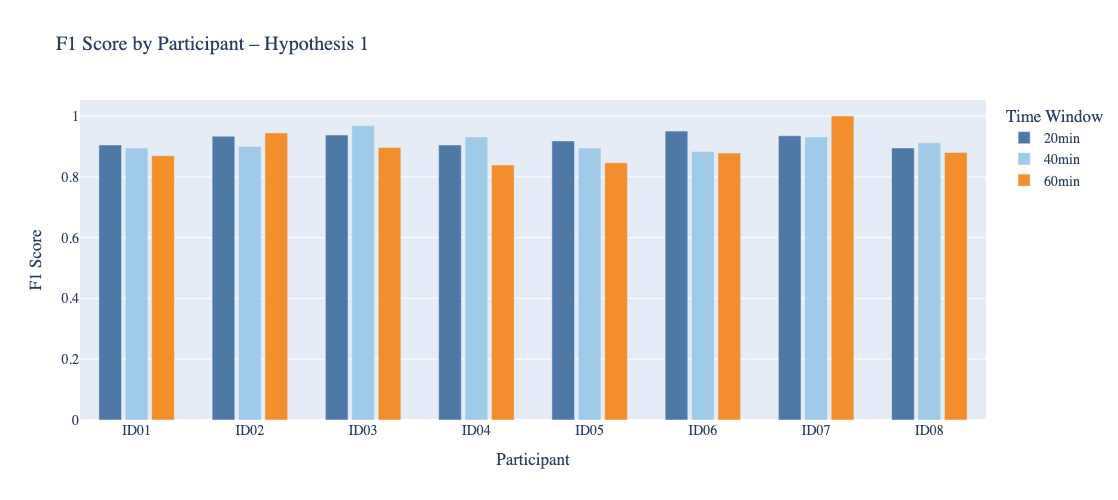

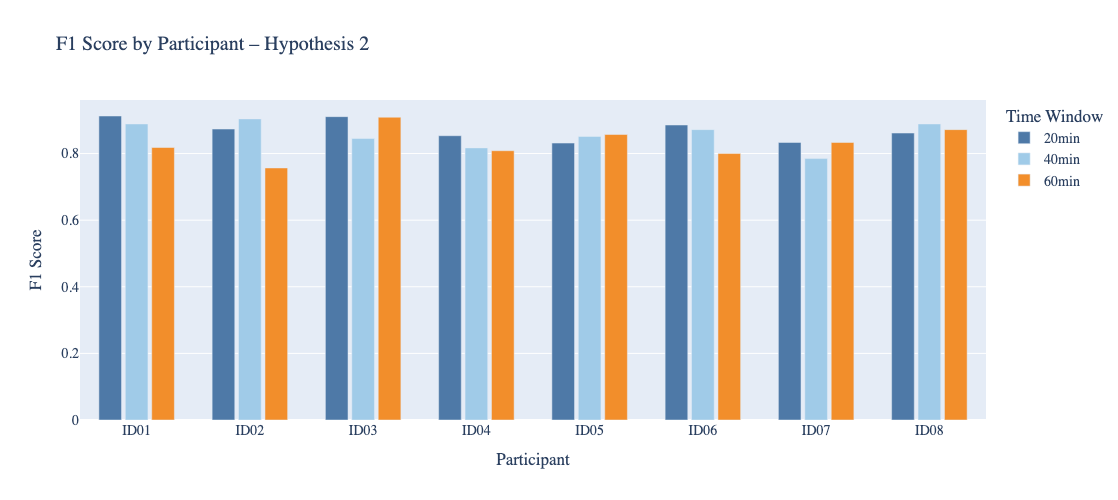

Hypothesis      H1                   H2              
TimeWindow   20min  40min  60min  20min  40min  60min
Participant                                          
ID01         0.905  0.895  0.870  0.913  0.889  0.818
ID02         0.933  0.900  0.944  0.874  0.904  0.757
ID03         0.938  0.968  0.897  0.911  0.845  0.909
ID04         0.905  0.931  0.839  0.854  0.817  0.809
ID05         0.918  0.895  0.846  0.831  0.851  0.857
ID06         0.950  0.883  0.878  0.886  0.872  0.800
ID07         0.935  0.931  1.000  0.833  0.785  0.833
ID08         0.895  0.912  0.880  0.862  0.889  0.872


In [49]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_excel("Confusion_data.xlsx")

def compute_f1(tp, fp, fn):
    denom = 2 * tp + fp + fn
    return 2 * tp / denom if denom else 0.0

df["F1"] = df.apply(lambda r: compute_f1(r["TP"], r["FP"], r["FN"]), axis=1)

time_colors = {
    "20min": "#4E79A7",  # Steel Blue
    "40min": "#A0CBE8",  # Sky Blue
    "60min": "#F28E2B"   # Pumpkin
}

hypothesis_labels = {
    "H1": "Hypothesis 1",
    "H2": "Hypothesis 2"
}

for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]
    participants = df_h["Participant"].unique()

    fig = go.Figure()

    for time_window in ["20min", "40min", "60min"]:
        y_vals = []
        for pid in participants:
            row = df_h[(df_h["Participant"] == pid) & (df_h["TimeWindow"] == time_window)]
            y_vals.append(row["F1"].values[0] if not row.empty else None)

        fig.add_trace(go.Bar(
            x=participants,
            y=y_vals,
            name=time_window,
            marker_color=time_colors[time_window],
            width=0.2
        ))

    fig.update_layout(
        title=f"F1 Score by Participant – {hypothesis_labels.get(hypothesis, hypothesis)}",
        xaxis_title="Participant",
        yaxis_title="F1 Score",
        barmode='group',
        bargap=0.3,
        font=dict(family="Segoe UI", size=14),
        legend_title_text="Time Window",
        height=500
    )

    fig.show()

f1_summary = df.pivot_table(
    index="Participant",
    columns=["Hypothesis", "TimeWindow"],
    values="F1"
).round(3)

print(f1_summary)
f1_summary.to_excel("F1_Score_Summary.xlsx")